In [22]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../interaction_logs.db")
df = pd.read_sql_query("SELECT * FROM interactions", conn)

print(df.head())

   id                         timestamp user_id  \
0   1  2025-06-24T22:01:27.194058+00:00    0001   
1   2  2025-06-24T22:01:44.606209+00:00    0001   
2   3  2025-06-24T22:02:23.989796+00:00    0001   
3   4  2025-06-24T22:22:31.213407+00:00    0001   
4   5  2025-06-24T22:23:10.141975+00:00    0001   

                             session_id                    user_message  \
0  5079f72b-8edb-4ff3-a2f6-3273458ab18f           I am not feeling well   
1  5079f72b-8edb-4ff3-a2f6-3273458ab18f            I just had a breakup   
2  5079f72b-8edb-4ff3-a2f6-3273458ab18f  I cry a lot like a little baby   
3  5079f72b-8edb-4ff3-a2f6-3273458ab18f                  dil tut gya ji   
4  5079f72b-8edb-4ff3-a2f6-3273458ab18f     cheat ki si mennu meri heer   

                                    chatbot_response context  
0  I'm sorry to hear you're not feeling well. Tha...          
1  Oh, I'm so sorry to hear that. Breakups are in...          
2  There's absolutely nothing wrong with that. Cr... 

In [4]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9b1
    Uninstalling nltk-3.9b1:
      Successfully uninstalled nltk-3.9b1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [textblob]


In [23]:
from textblob import TextBlob

df['user_sentiment'] = df['user_message'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (5.0 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl

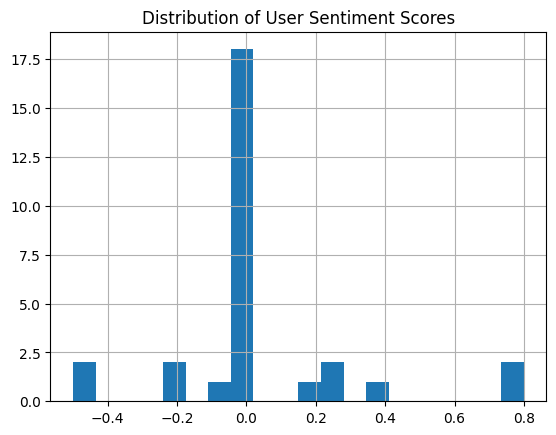

In [24]:
import matplotlib.pyplot as plt

df['user_sentiment'].hist(bins=20)
plt.title("Distribution of User Sentiment Scores")
plt.show()

In [28]:
df.head()

,id,timestamp,user_id,session_id,user_message,chatbot_response,context,user_sentiment
0,1,2025-06-24T22:01:27.194058+00:00,0001,5079f72b-8edb-4ff3-a2f6-3273458ab18f,I am not feeling well,I'm sorry to hear you're not feeling well. Tha...,,0.0000
1,2,2025-06-24T22:01:44.606209+00:00,0001,5079f72b-8edb-4ff3-a2f6-3273458ab18f,I just had a breakup,"Oh, I'm so sorry to hear that. Breakups are in...",,0.0000
2,3,2025-06-24T22:02:23.989796+00:00,0001,5079f72b-8edb-4ff3-a2f6-3273458ab18f,I cry a lot like a little baby,There's absolutely nothing wrong with that. Cr...,,-0.1875
3,4,2025-06-24T22:22:31.213407+00:00,0001,5079f72b-8edb-4ff3-a2f6-3273458ab18f,dil tut gya ji,"""Dil tut gaya ji"" - I understand. A broken hea...",,0.0000
4,5,2025-06-24T22:23:10.141975+00:00,0001,5079f72b-8edb-4ff3-a2f6-3273458ab18f,cheat ki si mennu meri heer,"""Cheat kiti si mennu meri heer"" - I hear you. ...",,0.0000


In [41]:
df['user_msg_len'] = df['user_message'].apply(lambda x: len(str(x).split()))

# 2. Group by session and aggregate
session_summary = df.groupby(['session_id', 'user_id']).agg(
    message_count=('id', 'count'),
    avg_msg_length=('user_msg_len', 'mean'),
    sentiment_avg=('user_sentiment', 'mean'),
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
).reset_index()

In [42]:
session_summary['start_time'] = pd.to_datetime(session_summary['start_time'])
session_summary['end_time'] = pd.to_datetime(session_summary['end_time'])
session_summary['session_duration_min'] = (session_summary['end_time'] - session_summary['start_time']).dt.total_seconds() / 60


In [43]:
session_summary['session_duration_min'] = (
    (session_summary['end_time'] - session_summary['start_time']).dt.total_seconds() / 60
)

In [44]:
session_summary.head()


,session_id,user_id,message_count,avg_msg_length,sentiment_avg,start_time,end_time,session_duration_min
0,00998877-6655-4433-2211-ffeeccddbb88,0009,1,4.0,0.25,2025-06-24 22:34:55.123123+00:00,2025-06-24 22:34:55.123123+00:00,0.0
1,11223344-5566-7788-99aa-bbccddeeff00,0005,1,6.0,0.35,2025-06-24 22:32:20.555555+00:00,2025-06-24 22:32:20.555555+00:00,0.0
2,11223344-5566-7788-99aa-bbccddeeff00,0017,1,5.0,0.00,2025-06-24 22:39:28.445566+00:00,2025-06-24 22:39:28.445566+00:00,0.0
3,1122aabb-ccdd-eeff-3344-556677889900,0011,1,5.0,-0.50,2025-06-24 22:36:10.112233+00:00,2025-06-24 22:36:10.112233+00:00,0.0
4,44556677-8899-aabb-ccdd-eeff00112233,0019,1,6.0,0.00,2025-06-24 22:40:35.778899+00:00,2025-06-24 22:40:35.778899+00:00,0.0


In [45]:
# Correlation between avg message length and sentiment
correlation = session_summary['avg_msg_length'].corr(session_summary['sentiment_avg'])
print(f"Correlation between message length and sentiment: {correlation:.2f}")


Correlation between message length and sentiment: 0.16
